<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r7_unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-15-m-1-r7.csv?token=AKVFSOHYWSXTCC53RQEM2C262EHTQ')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-15-m-11-r7.csv?token=AKVFSOBGZ4K2AAQC33DIDI262EHTW')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-4-m-1-r7.csv?token=AKVFSODCGXF6P57FRI2REA262EHT2')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-4-m-11-r7.csv?token=AKVFSOG53XK672UC4PO3TA262EHT6')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-6-m-1-r7.csv?token=AKVFSOCYFQNNWGZUOFDM3VK62EHUC')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-6-m-11-r7.csv?token=AKVFSOEXOMO4M5A4TGQRLX262EHUE')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-9-m-1-r7.csv?token=AKVFSOBT72R24IQBZYSFEJS62EHUK')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-9-m-11-r7.csv?token=AKVFSOA2BQJX6JGA4U353EK62EHUO')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-normal-n-0-15-r7.csv?token=AKVFSOCY3IN6RJTUIKXCHAC62EHUU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-normal-n-0-4-r7.csv?token=AKVFSOF57P3BOEGGJ2QTQ3C62EHUY')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-normal-n-0-6-r7.csv?token=AKVFSOHU6LG5T437367AUWS62EHU2')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-normal-n-0-9-r7.csv?token=AKVFSOBFK27VE2Q7GAKHEOS62EHU4')

df1['target'] = 0
df2['target'] = 0
df3['target'] = 0
df4['target'] = 0
df5['target'] = 0
df6['target'] = 0
df7['target'] = 0
df8['target'] = 0

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(67719, 30)
(77712, 30)
(60848, 30)
(70778, 30)
(60848, 30)
(70908, 30)
(56931, 30)
(66931, 30)
(48449, 30)
(41369, 30)
(41489, 30)
(37680, 30)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,0,1,1,1,4,3,9,11,11,23,7,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9,0
1,11,0,4,1,1,4,3,9,6,6,23,7,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9,0
2,11,0,4,1,1,4,3,9,6,6,23,7,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9,0
3,11,0,1,1,1,4,3,9,11,11,23,7,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9,0
4,11,0,1,1,1,4,3,9,11,11,23,7,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701657,3276767,1,0,4,1,1,5,19,23,7,15,15,30094,2,0,0.0,5,5,9,13,45,585,0,4,4,120376,20,95,100,0
701658,3276768,1,0,4,2,2,5,19,23,7,15,15,30094,2,0,0.0,6,4,10,13,40,520,0,8,16,481504,20,95,100,0
701659,3276769,1,0,4,3,2,5,19,23,7,15,15,30094,2,0,0.0,7,3,11,13,33,429,0,12,24,722256,20,95,100,0
701660,3276770,1,0,4,4,2,5,19,23,7,15,15,30094,2,0,0.0,8,2,12,13,24,312,0,16,32,963008,20,95,100,0


In [7]:
df.shape

(701662, 30)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-15-m-12-r7.csv?token=AKVFSOAA2TKQBEJKWHORCE262EIL2')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-15-m-7-r7.csv?token=AKVFSOB47BJTPUYNCXAFE3S62EIL4')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-4-m-12-r7.csv?token=AKVFSOARDMUK2HZLGKD3KVS62EIL6')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-4-m-7-r7.csv?token=AKVFSOGODYHZQ6QMTKEYMZ262EIMC')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-6-m-12-r7.csv?token=AKVFSOCW3HCNVXWQ6OVLAQS62EIME')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-6-m-7-r7.csv?token=AKVFSODQNA4AW3BATEDCEGC62EIMI')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-9-m-12-r7.csv?token=AKVFSOFN36UQ6B5QGBVHCEC62EIMK')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r7/2-fft-malicious-n-0-9-m-7-r7.csv?token=AKVFSOCTAI6WHQN6WR3OLF262EIMQ')

In [0]:
df13['target'] = 0
df14['target'] = 0
df15['target'] = 0
df16['target'] = 0
df17['target'] = 0
df18['target'] = 0
df19['target'] = 0
df20['target'] = 0

In [10]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(66804, 30)
(117841, 30)
(59990, 30)
(111192, 30)
(59878, 30)
(111054, 30)
(56144, 30)
(107338, 30)


In [11]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,0,4,1,1,4,3,9,6,6,23,7,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9,0
1,19,0,3,1,1,4,3,9,1,1,23,7,2,3,3,1.0,16,16,2,17,32,544,0,1,4,8,3,27,9,0
2,23,0,3,1,1,4,3,10,0,0,23,7,1,4,4,1.0,20,15,3,17,45,765,0,1,4,4,3,30,9,0
3,50,4,0,4,1,1,5,17,23,7,6,6,3,1,0,0.0,4,14,4,17,56,952,0,4,4,12,20,85,100,0
4,51,4,0,4,2,2,5,17,23,7,6,6,3,1,0,0.0,5,13,5,17,65,1105,0,8,16,48,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60843,3266191,4,0,4,1,1,5,17,23,7,0,0,30088,4,0,0.0,5,5,4,8,20,160,0,4,4,120352,20,85,100,0
60844,3266192,4,0,4,2,2,5,17,23,7,0,0,30088,4,0,0.0,6,4,5,8,20,160,0,8,16,481408,20,85,100,0
60845,3266193,4,0,4,3,2,5,17,23,7,0,0,30088,4,0,0.0,7,3,6,8,18,144,0,12,24,722112,20,85,100,0
60846,3266194,4,0,4,4,2,5,17,23,7,0,0,30088,4,0,0.0,8,2,7,8,14,112,0,16,32,962816,20,85,100,0


Processing

In [12]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [14]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.604655,-0.346660,-0.047473,0.073725,0.533105,0.565731,-0.052314,0.236315,-0.485771,-0.672542,-0.546422,-0.118680,0.103345,-0.009744,-0.010747,-0.015643,0.118883,-0.222785,-0.160979,-0.143241,0.127967,0.557146,0.408003,0.035013
inport,-0.604655,1.000000,0.125738,-0.047069,0.073115,-0.453382,-0.544057,0.004758,0.268099,0.759339,0.879351,0.584608,-0.017238,-0.222405,-0.152275,-0.139929,-0.114254,0.419428,0.055814,0.046251,0.038293,-0.256451,-0.506866,-0.418208,-0.007013
cache_coherence_type,-0.346660,0.125738,1.000000,0.258355,-0.401288,-0.294052,-0.315709,0.040830,-0.235282,0.009149,0.142798,-0.060129,0.079338,-0.061829,0.011126,0.016908,0.020384,-0.161235,0.504791,0.397401,0.300597,0.635549,-0.303858,0.115630,-0.003174
flit_id,-0.047473,-0.047069,0.258355,1.000000,0.038277,0.178179,0.144469,0.010672,-0.021241,-0.039301,-0.035490,0.313932,-0.039596,0.096994,0.036472,0.013787,0.010454,-0.104520,0.941018,0.906527,0.647558,0.369491,0.164207,0.293994,0.001561
flit_type,0.073725,0.073115,-0.401288,0.038277,1.000000,-0.276761,-0.224400,-0.016605,0.032968,0.061035,0.055129,0.354469,-0.052148,0.059423,0.004623,-0.000969,-0.001015,0.162344,-0.033373,0.220004,0.153246,-0.573915,-0.255058,-0.456651,-0.002440
vnet,0.533105,-0.453382,-0.294052,0.178179,-0.276761,1.000000,0.974580,-0.037267,0.175704,-0.414449,-0.582698,-0.561879,-0.075083,0.156046,0.051446,0.031488,0.016189,-0.138720,-0.046929,-0.067557,-0.072140,0.551042,0.991221,0.915377,-0.029112
vc,0.565731,-0.544057,-0.315709,0.144469,-0.224400,0.974580,1.000000,-0.032519,0.105517,-0.501949,-0.664596,-0.590458,-0.061098,0.184561,0.078452,0.059047,0.039990,-0.192536,-0.077243,-0.085576,-0.082723,0.511601,0.994780,0.879838,-0.024665
traversal_id,-0.052314,0.004758,0.040830,0.010672,-0.016605,-0.037267,-0.032519,1.000000,-0.024122,0.006703,0.017761,0.033984,0.071998,0.072051,0.091533,0.053010,0.028375,-0.047927,0.024711,0.018210,0.552850,0.005544,-0.034759,-0.021531,-0.247840
hop_count,0.236315,0.268099,-0.235282,-0.021241,0.032968,0.175704,0.105517,-0.024122,1.000000,0.612467,0.176234,0.198165,-0.131729,-0.089369,-0.140491,-0.134730,-0.116219,0.386244,-0.135409,-0.101590,-0.085808,-0.063490,0.139466,0.083493,0.045296
current_hop,-0.485771,0.759339,0.009149,-0.039301,0.061035,-0.414449,-0.501949,0.006703,0.612467,1.000000,0.785338,0.672102,-0.033140,-0.207558,-0.152946,-0.138535,-0.111644,0.414131,0.008943,0.005734,0.009380,-0.326792,-0.465519,-0.426857,0.004272


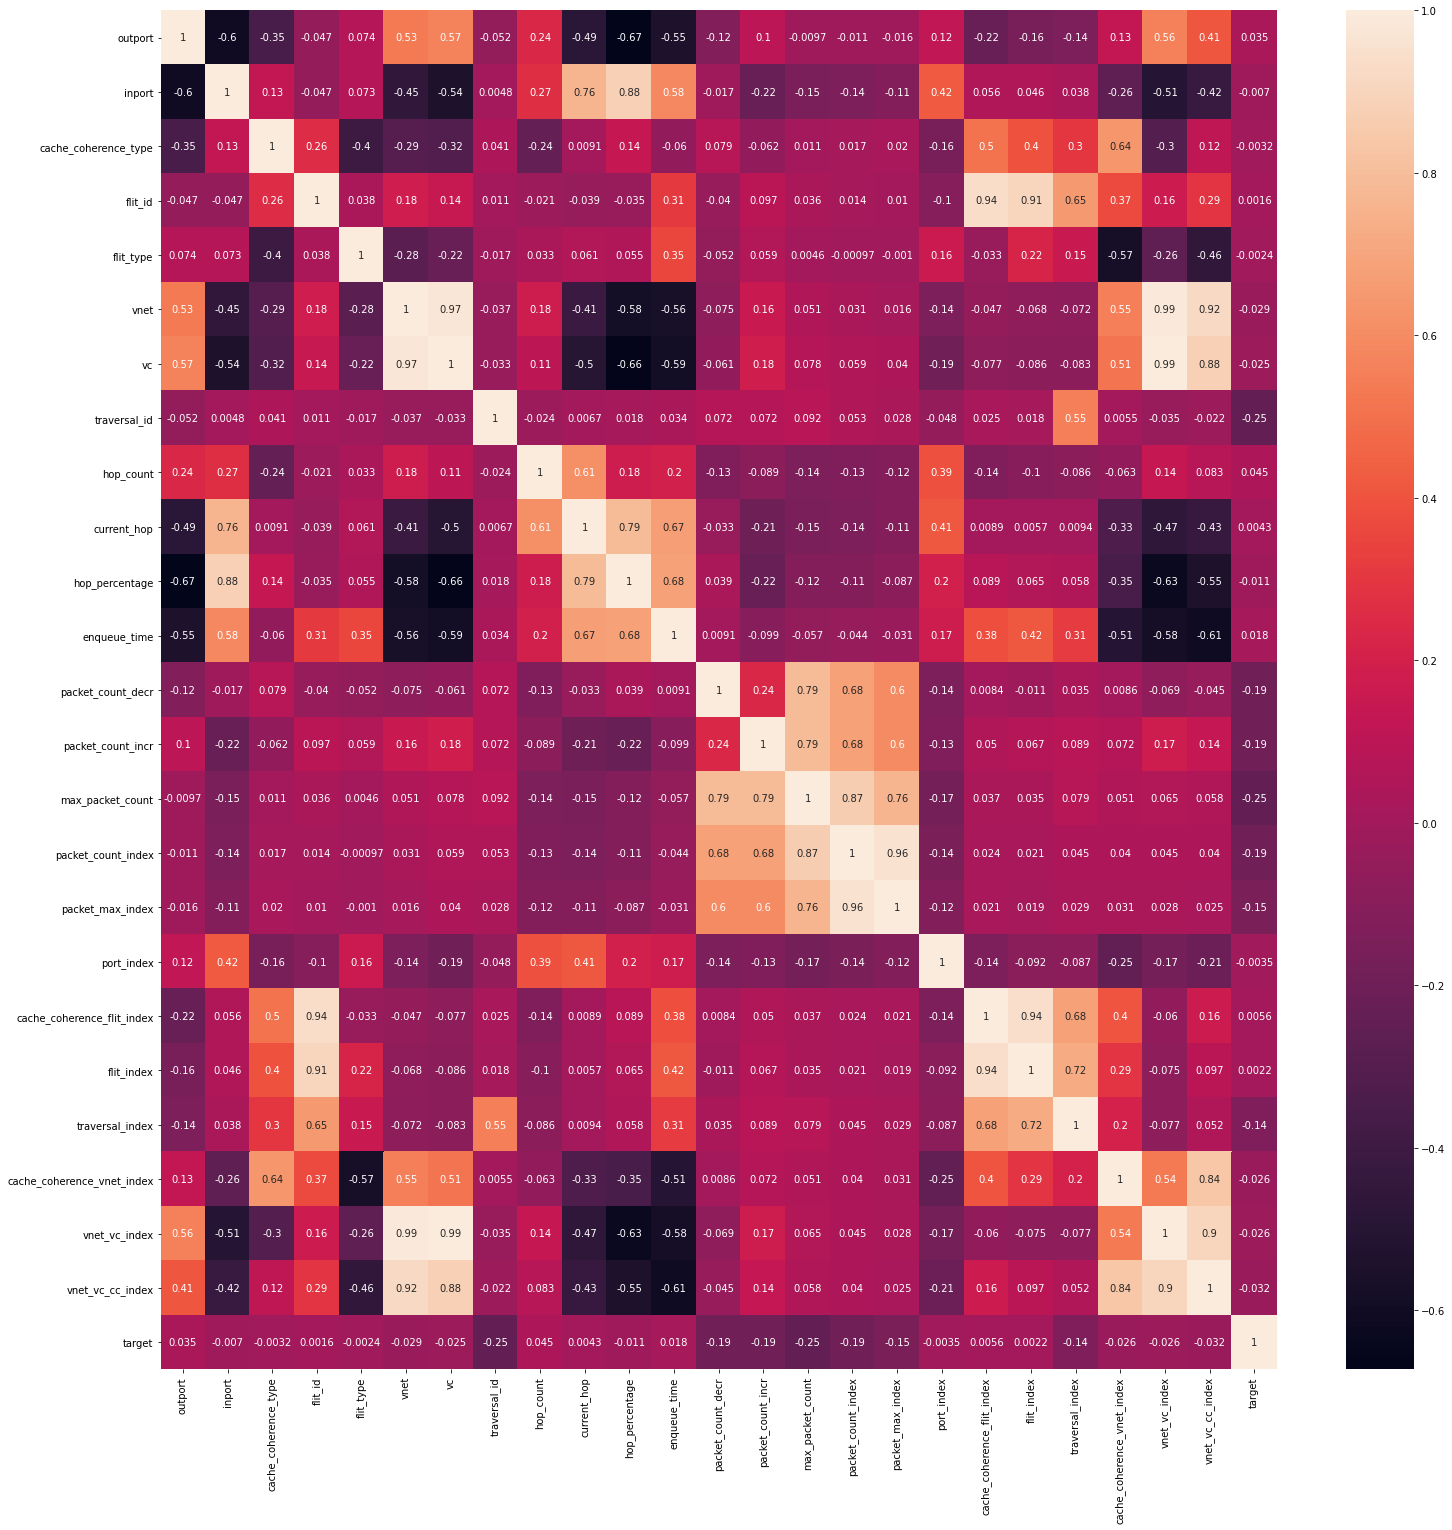

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [16]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0,1,1,1,4,3,9,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9
1,0,4,1,1,4,3,9,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9
2,0,4,1,1,4,3,9,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9
3,0,1,1,1,4,3,9,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9
4,0,1,1,1,4,3,9,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701657,1,0,4,1,1,5,19,30094,2,0,0.0,5,5,9,13,45,585,0,4,4,120376,20,95,100
701658,1,0,4,2,2,5,19,30094,2,0,0.0,6,4,10,13,40,520,0,8,16,481504,20,95,100
701659,1,0,4,3,2,5,19,30094,2,0,0.0,7,3,11,13,33,429,0,12,24,722256,20,95,100
701660,1,0,4,4,2,5,19,30094,2,0,0.0,8,2,12,13,24,312,0,16,32,963008,20,95,100


In [17]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.25,0.0,0.00,1.000000,0.0,0.000000,0.000066,0.166667,0.25,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.0
1,0.00,1.00,0.0,0.00,1.000000,0.0,0.000000,0.000066,0.166667,0.25,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.0
2,0.00,1.00,0.0,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.25,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.0
3,0.00,0.25,0.0,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.25,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.0
4,0.00,0.25,0.0,0.00,1.000000,0.0,0.000000,0.000066,0.166667,0.25,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701657,0.25,0.00,0.5,0.00,0.000000,1.0,0.909091,1.000000,0.333333,0.00,0.0,0.014706,0.105263,0.210526,0.315789,0.110276,0.037438,0.0,0.103448,0.000000,0.044445,0.944444,0.931507,1.0
701658,0.25,0.00,0.5,0.25,0.333333,1.0,0.909091,1.000000,0.333333,0.00,0.0,0.029412,0.078947,0.236842,0.315789,0.097744,0.033271,0.0,0.241379,0.139535,0.177782,0.944444,0.931507,1.0
701659,0.25,0.00,0.5,0.50,0.333333,1.0,0.909091,1.000000,0.333333,0.00,0.0,0.044118,0.052632,0.263158,0.315789,0.080201,0.027438,0.0,0.379310,0.232558,0.266674,0.944444,0.931507,1.0
701660,0.25,0.00,0.5,0.75,0.333333,1.0,0.909091,1.000000,0.333333,0.00,0.0,0.058824,0.026316,0.289474,0.315789,0.057644,0.019937,0.0,0.517241,0.325581,0.355566,0.944444,0.931507,1.0


In [18]:
train_X[train_X.duplicated()].shape

(27687, 24)

In [19]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(15, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.333333,0.4,1.0,0.114286,0.411765,0.000000,0.411765,0.043344,0.019755,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.228571,0.382353,0.029412,0.411765,0.083591,0.036952,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.833333,1.0,1.0,0.285714,0.352941,0.058824,0.411765,0.117647,0.051504,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.25,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000067,0.333333,0.0,0.0,0.000000,0.323529,0.088235,0.411765,0.145511,0.063409,0.0,0.103448,0.000000,0.000003,0.944444,0.794521,1.000000
4,0.25,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000067,0.333333,0.0,0.0,0.014286,0.294118,0.117647,0.411765,0.167183,0.072670,0.0,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66799,0.25,0.00,0.500000,0.25,0.333333,1.0,0.727273,1.000000,0.333333,0.0,0.0,0.014286,0.117647,0.029412,0.147059,0.027864,0.005203,0.0,0.241379,0.139535,0.177782,0.944444,0.794521,1.000000
66800,0.25,0.00,0.500000,0.50,0.333333,1.0,0.727273,1.000000,0.333333,0.0,0.0,0.028571,0.088235,0.058824,0.147059,0.034056,0.006262,0.0,0.379310,0.232558,0.266674,0.944444,0.794521,1.000000
66801,0.25,0.00,0.500000,0.75,0.333333,1.0,0.727273,1.000000,0.333333,0.0,0.0,0.042857,0.058824,0.088235,0.147059,0.034056,0.006262,0.0,0.517241,0.325581,0.355566,0.944444,0.794521,1.000000
66802,1.00,0.00,0.333333,0.00,1.000000,0.0,0.090909,1.000000,0.166667,0.0,0.0,0.057143,0.029412,0.117647,0.147059,0.027864,0.005203,0.0,0.068966,0.093023,0.133336,0.333333,0.041096,0.197802


In [20]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 24)


In [21]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(32, 24)


In [22]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(26, 24)


In [23]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(27, 24)


In [24]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(1, 24)


In [25]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(40, 24)


In [26]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(22, 24)


In [27]:
test_X8 = test_X[:30000]
test_X9 = test_X1[:30000]
test_X10  = test_X2[:30000]
test_X11  = test_X3[:30000]
test_X12  = test_X4[:30000]
test_X13  = test_X5[:30000]
test_X14  = test_X6[:30000]
test_X15  = test_X7[:30000]

test_Y8 = test_Y[:30000]
test_Y9 = test_Y1[:30000]
test_Y10  = test_Y2[:30000]
test_Y11  = test_Y3[:30000]
test_Y12  = test_Y4[:30000]
test_Y13  = test_Y5[:30000]
test_Y14  = test_Y6[:30000]
test_Y15  = test_Y7[:30000]

test_X8

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.333333,0.4,1.0,0.114286,0.411765,0.000000,0.411765,0.043344,0.019755,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.228571,0.382353,0.029412,0.411765,0.083591,0.036952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.833333,1.0,1.0,0.285714,0.352941,0.058824,0.411765,0.117647,0.051504,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.25,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000067,0.333333,0.0,0.0,0.000000,0.323529,0.088235,0.411765,0.145511,0.063409,0.000000,0.103448,0.000000,0.000003,0.944444,0.794521,1.000000
4,0.25,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000067,0.333333,0.0,0.0,0.014286,0.294118,0.117647,0.411765,0.167183,0.072670,0.000000,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,1.00,0.166667,0.00,1.000000,0.0,0.090909,0.436224,0.333333,0.4,1.0,0.514286,0.205882,0.000000,0.205882,0.021672,0.005556,0.000000,0.034483,0.046512,0.038777,0.166667,0.041096,0.098901
29996,0.25,1.00,1.000000,0.00,1.000000,0.0,0.181818,0.436191,0.666667,0.4,0.5,0.128571,0.176471,0.029412,0.205882,0.040248,0.009789,0.333333,0.206897,0.279070,0.135713,1.000000,0.082192,0.593407
29997,1.00,0.00,0.333333,0.00,1.000000,0.0,0.272727,0.436224,0.333333,0.0,0.0,0.000000,0.147059,0.058824,0.205882,0.052632,0.012611,0.000000,0.068966,0.093023,0.058166,0.333333,0.123288,0.197802
29998,0.25,0.00,0.500000,0.00,0.000000,1.0,0.909091,0.436224,0.333333,0.0,0.0,0.014286,0.117647,0.088235,0.205882,0.058824,0.014022,0.000000,0.103448,0.000000,0.019388,0.944444,0.931507,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [29]:
train_Y = df['target']
train_Y.value_counts()

0    532675
1    168987
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  7920.870601
7                 traversal_id  5948.863514
13           packet_count_incr  3966.370544
12           packet_count_decr  3954.503345
15          packet_count_index  2868.346548
20             traversal_index  1936.360601
16            packet_max_index  1553.320445
5                         vnet   301.521704
0                      outport   296.652732
22               vnet_vc_index   192.817737
8                    hop_count   161.763170
6                           vc   158.219720
23            vnet_vc_cc_index    96.292484
21  cache_coherence_vnet_index    36.111189
11                enqueue_time    28.626641
10              hop_percentage    25.715016
1                       inport     9.081001


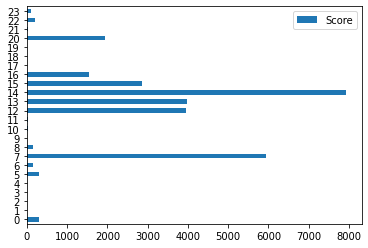

In [32]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [35]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pickle.dump(logreg, open("logreg-r7.pickle.dat", 'wb'))

In [37]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 75.91341263323291
Test Prediction  75.9985178112062


In [38]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X7)
logreg_score_test = accuracy_score(test_Y7,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  93.30279623974612
Test Prediction  92.97612885158816
Test Prediction  89.7832972162027
Test Prediction  92.08486222030362
Test Prediction  90.59754834830824
Test Prediction  92.14526266500982
Test Prediction  89.5180250783699
Test Prediction  91.29758333488606


In [39]:
y_pred_test = logreg.predict(test_X8)
logreg_score_test = accuracy_score(test_Y8,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X9)
logreg_score_test = accuracy_score(test_Y9,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X10)
logreg_score_test = accuracy_score(test_Y10,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X11)
logreg_score_test = accuracy_score(test_Y11,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X12)
logreg_score_test = accuracy_score(test_Y12,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X13)
logreg_score_test = accuracy_score(test_Y13,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X14)
logreg_score_test = accuracy_score(test_Y14,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X15)
logreg_score_test = accuracy_score(test_Y15,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  85.08666666666667
Test Prediction  85.61999999999999
Test Prediction  79.57
Test Prediction  83.19333333333333
Test Prediction  81.23333333333333
Test Prediction  83.71666666666667
Test Prediction  80.38333333333333
Test Prediction  80.89666666666666


In [40]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
16,packet_max_index,2.857586
22,vnet_vc_index,2.340946
8,hop_count,1.394970
18,cache_coherence_flit_index,0.843741
11,enqueue_time,0.584403
1,inport,0.449854
15,packet_count_index,0.443831
2,cache_coherence_type,0.234744
0,outport,0.043557
19,flit_index,-0.018794


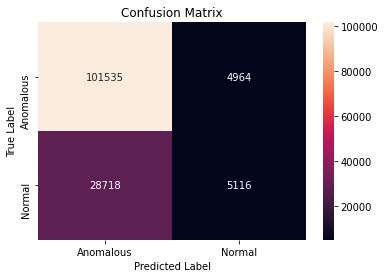

In [41]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86    106499
           1       0.51      0.15      0.23     33834

    accuracy                           0.76    140333
   macro avg       0.64      0.55      0.55    140333
weighted avg       0.71      0.76      0.71    140333



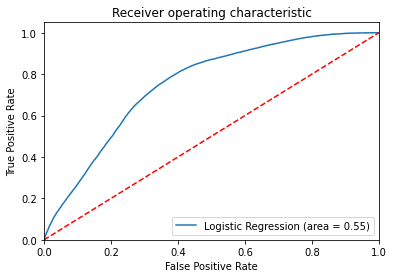

In [43]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

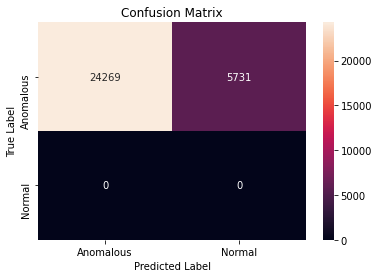

In [44]:
cm = confusion_matrix(test_Y15, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
print(classification_report(test_Y15, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.81     30000
   macro avg       0.50      0.40      0.45     30000
weighted avg       1.00      0.81      0.89     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pickle.dump(knn, open("knn-r7.pickle.dat", 'wb'))

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.10968537124873
Test Prediction  80.4686296346837


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X7)
knn_score_test = accuracy_score(test_Y7,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  86.74993877051187
Test Prediction  86.93318718136976
Test Prediction  85.96918004443059
Test Prediction  88.547460377397
Test Prediction  86.09739676840216
Test Prediction  88.68851780578146
Test Prediction  85.99722878800227
Test Prediction  89.4792927568619


In [0]:
y_pred_knn_test= knn.predict(test_X8)
knn_score_test = accuracy_score(test_Y8,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X9)
knn_score_test = accuracy_score(test_Y9,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X10)
knn_score_test = accuracy_score(test_Y10,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X11)
knn_score_test = accuracy_score(test_Y11,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X12)
knn_score_test = accuracy_score(test_Y12,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X13)
knn_score_test = accuracy_score(test_Y13,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X14)
knn_score_test = accuracy_score(test_Y14,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X15)
knn_score_test = accuracy_score(test_Y15,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  81.04
Test Prediction  81.34333333333333
Test Prediction  79.74333333333334
Test Prediction  83.10333333333332
Test Prediction  79.35666666666667
Test Prediction  83.29333333333334
Test Prediction  78.81333333333333
Test Prediction  85.13


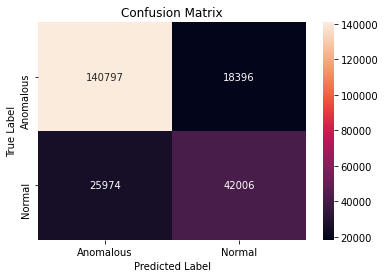

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86    159193
           1       0.70      0.62      0.65     67980

    accuracy                           0.80    227173
   macro avg       0.77      0.75      0.76    227173
weighted avg       0.80      0.80      0.80    227173



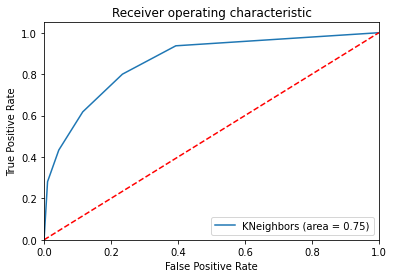

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

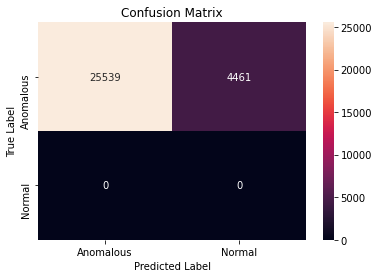

In [0]:
cm = confusion_matrix(test_Y15, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.85     30000
   macro avg       0.50      0.43      0.46     30000
weighted avg       1.00      0.85      0.92     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pickle.dump(nb, open("nb-r7.pickle.dat", 'wb'))

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 61.44768843059789
Test Prediction Score 61.42499328705436


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X7)
nb_score_test = accuracy_score(test_Y7,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 60.53963588864397
Test Prediction  58.91130575059719
Test Prediction  58.02615574833385
Test Prediction  57.149417779909584
Test Prediction  58.839970621837764
Test Prediction  58.64216690462888
Test Prediction  56.529668269622626
Test Prediction  59.82391342582534


In [0]:
y_pred_nb_test= nb.predict(test_X8)
nb_score_test = accuracy_score(test_Y8,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X9)
nb_score_test = accuracy_score(test_Y9,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X10)
nb_score_test = accuracy_score(test_Y10,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X11)
nb_score_test = accuracy_score(test_Y11,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X12)
nb_score_test = accuracy_score(test_Y12,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X13)
nb_score_test = accuracy_score(test_Y13,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X14)
nb_score_test = accuracy_score(test_Y14,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X15)
nb_score_test = accuracy_score(test_Y15,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 38.14666666666667
Test Prediction  34.69
Test Prediction  33.58333333333333
Test Prediction  31.929999999999996
Test Prediction  34.626666666666665
Test Prediction  33.84666666666667
Test Prediction  31.033333333333335
Test Prediction  35.27666666666667


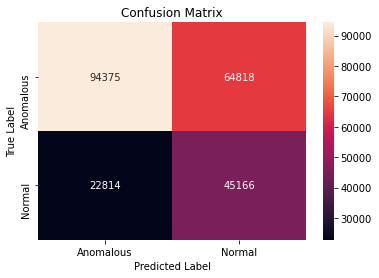

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68    159193
           1       0.41      0.66      0.51     67980

    accuracy                           0.61    227173
   macro avg       0.61      0.63      0.60    227173
weighted avg       0.69      0.61      0.63    227173



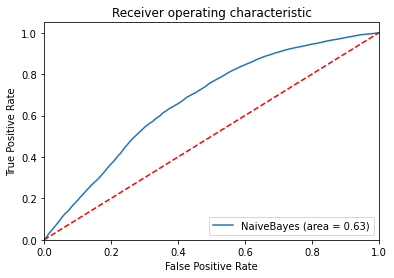

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 726952 samples, validate on 181738 samples
Epoch 1/15
726952/726952 [==============================] - 29s 40us/step - loss: 0.1925 - accuracy: 0.6990 - val_loss: 0.1892 - val_accuracy: 0.7011
Epoch 2/15
726952/726952 [==============================] - 28s 38us/step - loss: 0.1874 - accuracy: 0.7022 - val_loss: 0.1871 - val_accuracy: 0.7026
Epoch 3/15
726952/726952 [==============================] - 28s 38us/step - loss: 0.1861 - accuracy: 0.7039 - val_loss: 0.1864 - val_accuracy: 0.7040
Epoch 4/15
726952/726952 [==============================] - 27s 38us/step - loss: 0.1849 - accuracy: 0.7029 - val_loss: 0.1848 - val_accuracy: 0.7006
Epoch 5/15
726952/726952 [==============================] - 29s 40us/step - loss: 0.1841 - accuracy: 0.7025 - val_loss: 0.1845 - val_accuracy: 0.7011
Epoch 6/15
726952/726952 [==============================] - 28s 39us/step - loss: 0.1839 - accuracy: 0.7034 - val_loss: 0.1843 - val_accuracy: 0.7034
Epoch 7/15
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn2-r7.json", "w") as file:
   file.write(json_file)
model.save_weights("nn2-r7.h5")

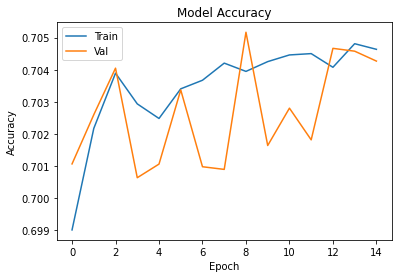

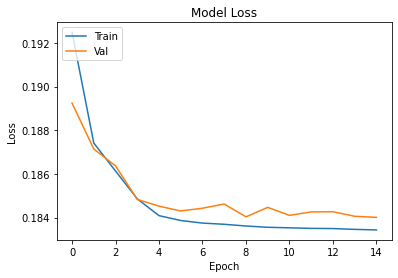

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.44%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.43%
accuracy: 96.63%
accuracy: 96.89%
accuracy: 96.48%
accuracy: 96.69%
accuracy: 96.54%
accuracy: 96.68%
accuracy: 96.46%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 94.50%
accuracy: 94.54%
accuracy: 95.35%
accuracy: 94.56%
accuracy: 94.98%
accuracy: 94.42%
accuracy: 94.92%
accuracy: 94.31%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 726952 samples, validate on 181738 samples
Epoch 1/15
726952/726952 [==============================] - 27s 38us/step - loss: 0.2021 - accuracy: 0.7016 - val_loss: 0.1953 - val_accuracy: 0.6987
Epoch 2/15
726952/726952 [==============================] - 27s 37us/step - loss: 0.1932 - accuracy: 0.6992 - val_loss: 0.1932 - val_accuracy: 0.7010
Epoch 3/15
726952/726952 [==============================] - 27s 37us/step - loss: 0.1919 - accuracy: 0.6992 - val_loss: 0.1930 - val_accuracy: 0.7018
Epoch 4/15
726952/726952 [==============================] - 27s 38us/step - loss: 0.1915 - accuracy: 0.6994 - val_loss: 0.1919 - val_accuracy: 0.6987
Epoch 5/15
726952/726952 [==============================] - 28s 39us/step - loss: 0.1911 - accuracy: 0.7000 - val_loss: 0.1915 - val_accuracy: 0.6989
Epoch 6/15
726952/726952 [==============================] - 27s 37us/step - loss: 0.1908 - accuracy: 0.7005 - val_loss: 0.1914 - val_accuracy: 0.7009
Epoch 7/15
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn3-r7.json", "w") as file:
   file.write(json_file)
model.save_weights("nn3-r7.h5")

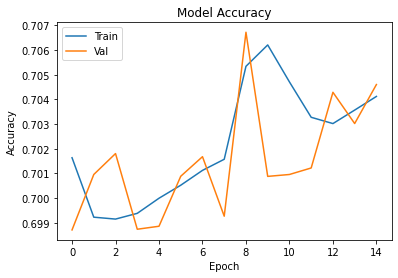

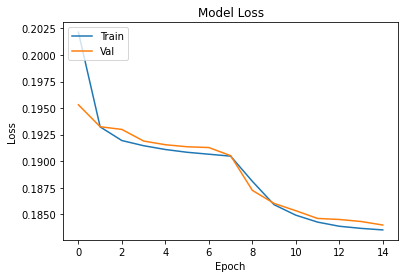

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.47%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.19%
accuracy: 99.35%
accuracy: 99.41%
accuracy: 99.11%
accuracy: 99.34%
accuracy: 99.24%
accuracy: 99.37%
accuracy: 99.18%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.07%
accuracy: 99.31%
accuracy: 99.45%
accuracy: 98.91%
accuracy: 99.38%
accuracy: 99.08%
accuracy: 99.37%
accuracy: 98.96%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 726952 samples, validate on 181738 samples
Epoch 1/30
726952/726952 [==============================] - 28s 39us/step - loss: 0.2101 - accuracy: 0.7008 - val_loss: 0.2096 - val_accuracy: 0.7010
Epoch 2/30
726952/726952 [==============================] - 28s 39us/step - loss: 0.2093 - accuracy: 0.7018 - val_loss: 0.2096 - val_accuracy: 0.7010
Epoch 3/30
726952/726952 [==============================] - 28s 38us/step - loss: 0.2093 - accuracy: 0.7018 - val_loss: 0.2096 - val_accuracy: 0.7010
Epoch 4/30
726952/726952 [==============================] - 28s 38us/step - loss: 0.2093 - accuracy: 0.7018 - val_loss: 0.2096 - val_accuracy: 0.7010
Epoch 5/30
726952/726952 [==============================] - 28s 38us/step - loss: 0.2093 - accuracy: 0.7018 - val_loss: 0.2096 - val_accuracy: 0.7010
Epoch 6/30
726952/726952 [==============================] - 28s 39us/step - loss: 0.2093 - accuracy: 0.7018 - val_loss: 0.2096 - val_accuracy: 0.7010
Epoch 7/30
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn4-r7.json", "w") as file:
   file.write(json_file)
model.save_weights("nn4-r7.h5")

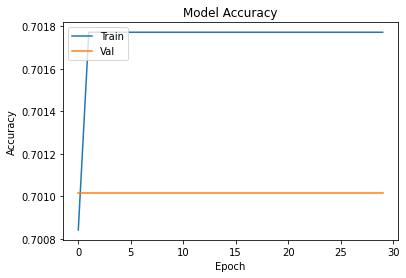

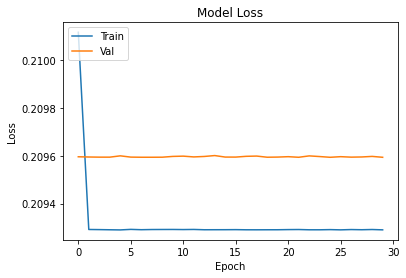

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.08%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 726952 samples, validate on 181738 samples
Epoch 1/50
726952/726952 [==============================] - 55s 75us/step - loss: 0.1809 - accuracy: 0.7086 - val_loss: 0.1719 - val_accuracy: 0.7249
Epoch 2/50
726952/726952 [==============================] - 50s 69us/step - loss: 0.1740 - accuracy: 0.7229 - val_loss: 0.1691 - val_accuracy: 0.7282
Epoch 3/50
726952/726952 [==============================] - 51s 70us/step - loss: 0.1685 - accuracy: 0.7340 - val_loss: 0.1570 - val_accuracy: 0.7527
Epoch 4/50
726952/726952 [==============================] - 51s 70us/step - loss: 0.1651 - accuracy: 0.7394 - val_loss: 0.1553 - val_accuracy: 0.7588
Epoch 5/50
726952/726952 [==============================] - 51s 71us/step - loss: 0.1627 - accuracy: 0.7435 - val_loss: 0.1551 - val_accuracy: 0.7565
Epoch 6/50
726952/726952 [==============================] - 51s 70us/step - loss: 0.1608 - accuracy: 0.7466 - val_loss: 0.1538 - val_accuracy: 0.7535
Epoch 7/50
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn5-r7.json", "w") as file:
   file.write(json_file)
model.save_weights("nn5-r7.h5")

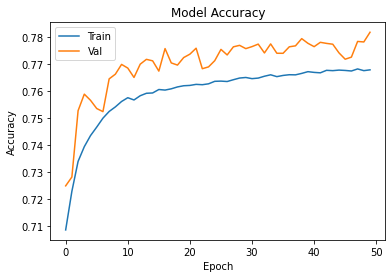

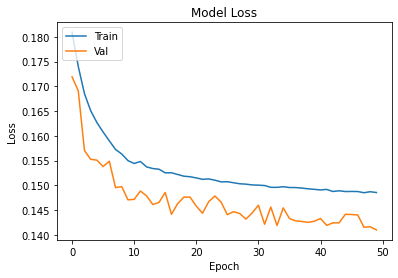

In [0]:
 # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.04%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.62%
accuracy: 90.01%
accuracy: 89.96%
accuracy: 89.81%
accuracy: 89.83%
accuracy: 90.45%
accuracy: 89.56%
accuracy: 90.25%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.53%
accuracy: 89.16%
accuracy: 89.03%
accuracy: 88.05%
accuracy: 89.20%
accuracy: 89.22%
accuracy: 88.29%
accuracy: 89.43%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 726952 samples, validate on 181738 samples
Epoch 1/50
726952/726952 [==============================] - 53s 73us/step - loss: 0.1825 - accuracy: 0.7063 - val_loss: 0.1731 - val_accuracy: 0.7182
Epoch 2/50
726952/726952 [==============================] - 54s 75us/step - loss: 0.1746 - accuracy: 0.7215 - val_loss: 0.1642 - val_accuracy: 0.7465
Epoch 3/50
726952/726952 [==============================] - 54s 74us/step - loss: 0.1683 - accuracy: 0.7343 - val_loss: 0.1631 - val_accuracy: 0.7444
Epoch 4/50
726952/726952 [==============================] - 54s 74us/step - loss: 0.1640 - accuracy: 0.7421 - val_loss: 0.1582 - val_accuracy: 0.7522
Epoch 5/50
726952/726952 [==============================] - 53s 74us/step - loss: 0.1617 - accuracy: 0.7469 - val_loss: 0.1516 - val_accuracy: 0.7654
Epoch 6/50
726952/726952 [==============================] - 52s 72us/step - loss: 0.1599 - accuracy: 0.7497 - val_loss: 0.1609 - val_accuracy: 0.7452
Epoch 7/50
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn6-r7.json", "w") as file:
   file.write(json_file)
model.save_weights("nn6-r7.h5")

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.16%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.43%
accuracy: 91.73%
accuracy: 91.97%
accuracy: 92.02%
accuracy: 91.79%
accuracy: 92.00%
accuracy: 91.88%
accuracy: 92.05%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.84%
accuracy: 93.89%
accuracy: 93.71%
accuracy: 93.81%
accuracy: 93.86%
accuracy: 93.73%
accuracy: 93.72%
accuracy: 94.19%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r7.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.19681079355996
Test Prediction Score 91.2168259432239


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 85.10388603151277
Test Prediction Score 87.54847316008811
Test Prediction Score 87.19554487791639
Test Prediction Score 89.87620806841724
Test Prediction Score 86.95834013383384
Test Prediction Score 89.30411571171395
Test Prediction Score 87.22797293992991
Test Prediction Score 90.48594514623876


In [0]:
y_pred_dt_test= dt.predict(test_X8)
dt_score_test = accuracy_score(test_Y8,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X9)
dt_score_test = accuracy_score(test_Y9,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X10)
dt_score_test = accuracy_score(test_Y10,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X11)
dt_score_test = accuracy_score(test_Y11,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X12)
dt_score_test = accuracy_score(test_Y12,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X13)
dt_score_test = accuracy_score(test_Y13,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X14)
dt_score_test = accuracy_score(test_Y14,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X15)
dt_score_test = accuracy_score(test_Y15,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 80.19
Test Prediction Score 83.33
Test Prediction Score 86.45666666666668
Test Prediction Score 87.44333333333333
Test Prediction Score 82.57666666666667
Test Prediction Score 85.74000000000001
Test Prediction Score 84.84666666666666
Test Prediction Score 88.64666666666666


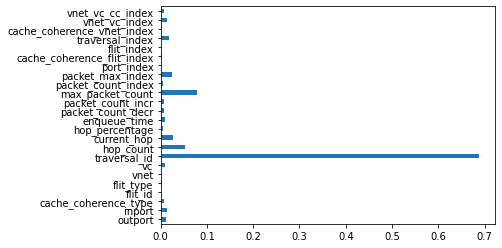

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

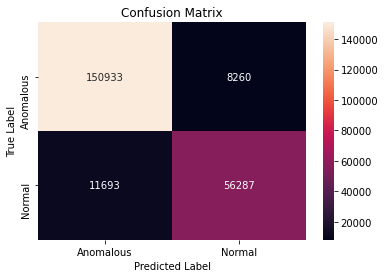

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    159193
           1       0.87      0.83      0.85     67980

    accuracy                           0.91    227173
   macro avg       0.90      0.89      0.89    227173
weighted avg       0.91      0.91      0.91    227173



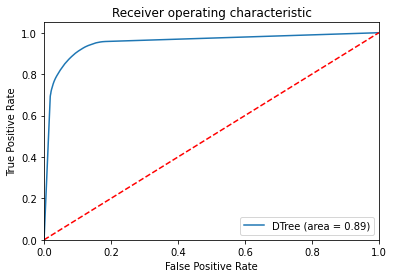

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
pickle.dump(rf, open("rf-r7.pickle.dat", 'wb'))

In [0]:
 y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.91292960195446
Test Prediction Score 93.68718993894521


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X7)
rf_score_test = accuracy_score(test_Y7,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 85.94068903583965
Test Prediction Score 88.92175010082417
Test Prediction Score 88.38974276495009
Test Prediction Score 91.8693296049476
Test Prediction Score 88.47927207442467
Test Prediction Score 90.92018954207792
Test Prediction Score 88.42815225364741
Test Prediction Score 92.02540943749547


In [0]:
y_pred_rf_test= rf.predict(test_X8)
rf_score_test = accuracy_score(test_Y8,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X9)
rf_score_test = accuracy_score(test_Y9,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X10)
rf_score_test = accuracy_score(test_Y10,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X11)
rf_score_test = accuracy_score(test_Y11,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X12)
rf_score_test = accuracy_score(test_Y12,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X13)
rf_score_test = accuracy_score(test_Y13,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X14)
rf_score_test = accuracy_score(test_Y14,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X15)
rf_score_test = accuracy_score(test_Y15,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 81.97333333333333
Test Prediction Score 85.98666666666666
Test Prediction Score 89.09666666666666
Test Prediction Score 90.54333333333334
Test Prediction Score 85.59666666666666
Test Prediction Score 89.4
Test Prediction Score 87.35000000000001
Test Prediction Score 91.42333333333333


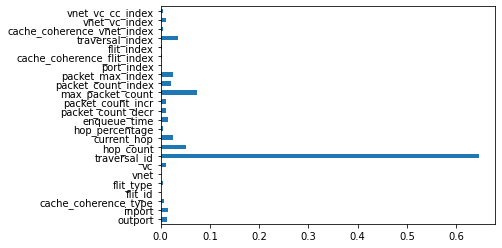

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

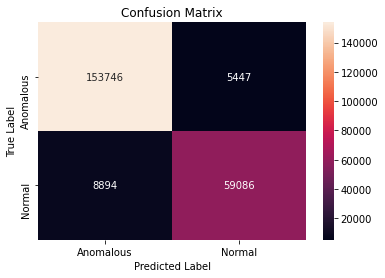

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    159193
           1       0.92      0.87      0.89     67980

    accuracy                           0.94    227173
   macro avg       0.93      0.92      0.92    227173
weighted avg       0.94      0.94      0.94    227173



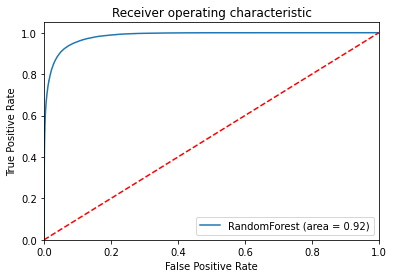

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r7.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.22184672446997
Test Prediction Score 95.70165249798693


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.74636249326387
Test Prediction Score 91.04046978555851
Test Prediction Score 86.89281546924488
Test Prediction Score 92.08306352975035
Test Prediction Score 84.94939710745182
Test Prediction Score 91.35195490482107
Test Prediction Score 84.30998860074095
Test Prediction Score 92.33263150049376


In [52]:
y_pred_xgbc_test= xgbc.predict(test_X8)
xgbc_score_test = accuracy_score(test_Y8,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X9)
xgbc_score_test = accuracy_score(test_Y9,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X10)
xgbc_score_test = accuracy_score(test_Y10,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X11)
xgbc_score_test = accuracy_score(test_Y11,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X12)
xgbc_score_test = accuracy_score(test_Y12,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X13)
xgbc_score_test = accuracy_score(test_Y13,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X14)
xgbc_score_test = accuracy_score(test_Y14,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X15)
xgbc_score_test = accuracy_score(test_Y15,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 78.03333333333333
Test Prediction Score 89.86
Test Prediction Score 80.67666666666666
Test Prediction Score 91.11
Test Prediction Score 78.45666666666666
Test Prediction Score 89.61666666666666
Test Prediction Score 76.79
Test Prediction Score 90.85


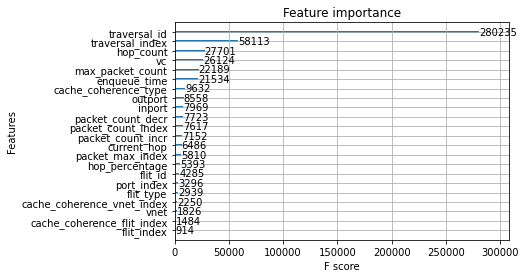

In [53]:
plot_importance(xgbc)
plt.show()

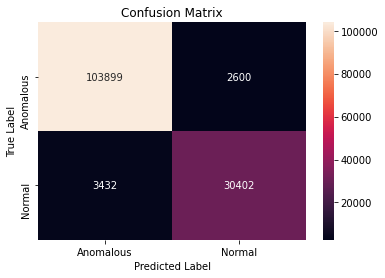

In [54]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [55]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    106499
           1       0.92      0.90      0.91     33834

    accuracy                           0.96    140333
   macro avg       0.94      0.94      0.94    140333
weighted avg       0.96      0.96      0.96    140333



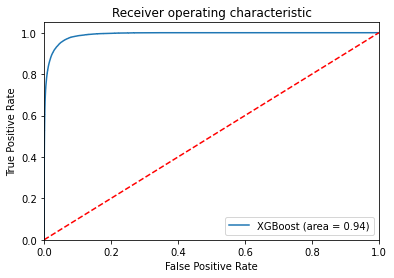

In [56]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [58]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
pickle.dump(gbm, open("gbm-r7.pickle.dat", 'wb'))

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [61]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.00660218873423
Test Prediction Score 85.14390770524396


In [62]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X7)
gbm_score_test = accuracy_score(test_Y7,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 90.21316088856955
Test Prediction Score 95.96914486469056
Test Prediction Score 89.6632772128688
Test Prediction Score 96.69490610835312
Test Prediction Score 88.13086609439193
Test Prediction Score 96.20004682406757
Test Prediction Score 87.90787973781704
Test Prediction Score 96.89392386666418


In [63]:
y_pred_gbm_test = gbm.predict(test_X8)
gbm_score_test = accuracy_score(test_Y8,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X9)
gbm_score_test = accuracy_score(test_Y9,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X10)
gbm_score_test = accuracy_score(test_Y10,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X11)
gbm_score_test = accuracy_score(test_Y11,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X12)
gbm_score_test = accuracy_score(test_Y12,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X13)
gbm_score_test = accuracy_score(test_Y13,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X14)
gbm_score_test = accuracy_score(test_Y14,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X15)
gbm_score_test = accuracy_score(test_Y15,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 83.66666666666667
Test Prediction Score 96.12666666666667
Test Prediction Score 82.70666666666666
Test Prediction Score 97.11666666666666
Test Prediction Score 80.78333333333333
Test Prediction Score 96.52
Test Prediction Score 80.17
Test Prediction Score 97.16333333333334


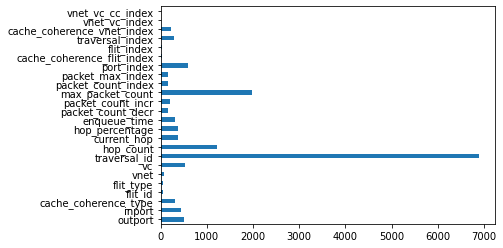

In [64]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

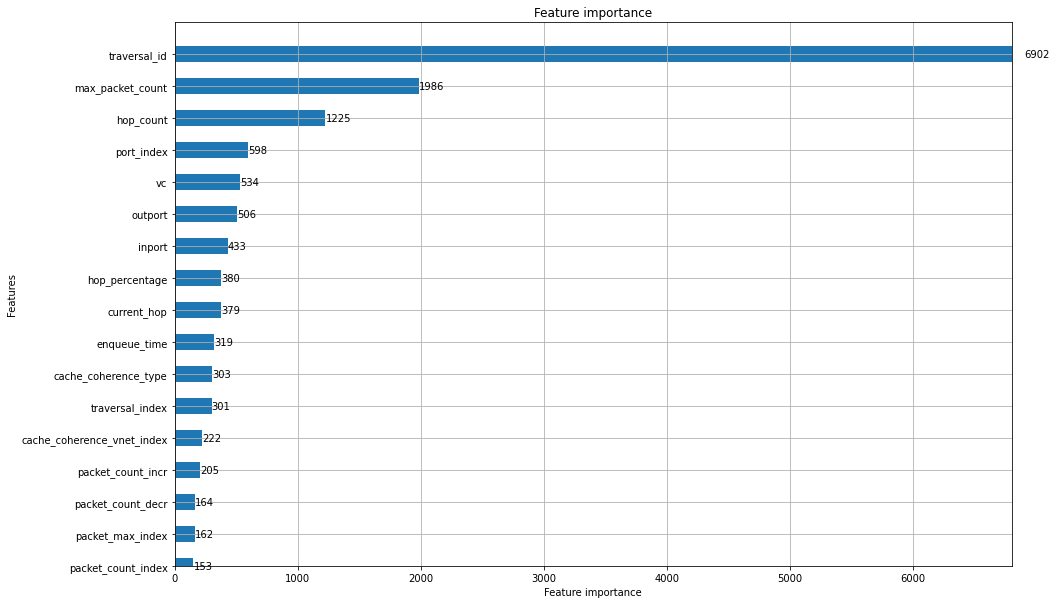

In [65]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [66]:
sorted(gbm.feature_importances_,reverse=True)

[6902,
 1986,
 1225,
 598,
 534,
 506,
 433,
 380,
 379,
 319,
 303,
 301,
 222,
 205,
 164,
 162,
 153,
 64,
 62,
 45,
 34,
 22,
 1,
 0]

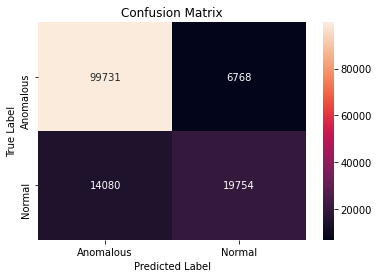

In [67]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91    106499
           1       0.74      0.58      0.65     33834

    accuracy                           0.85    140333
   macro avg       0.81      0.76      0.78    140333
weighted avg       0.84      0.85      0.84    140333



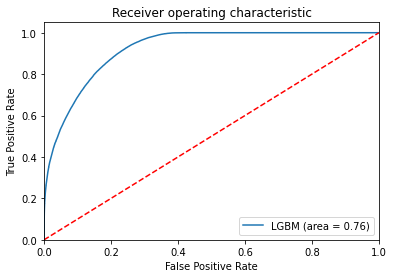

In [69]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()